<a href="https://colab.research.google.com/github/bahamalytixs/BahamaLytixs/blob/master/HRolle_House_Sales_in_King_Count_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>


In [ ]:
#https://www.kaggle.com/datasets/shivachandel/kc-house-data

#https://www.kaggle.com/code/vardhanguru/coursera-data-analysis/data?select=kc_house_data.csv

# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


You will require the following libraries:


In [ ]:
# Import piplite lines added - 22/4/22

#you are running the lab in your  browser, so we will install the libraries using ``piplite``
#import piplite
#await piplite.install(['pandas'])
#await piplite.install(['matplotlib'])
#await piplite.install(['scipy'])
#await piplite.install(['seaborn'])
#await piplite.install(['ipywidgets'])
#await piplite.install(['tqdm'])

In [ ]:
#!pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Load the csv:


In [ ]:
#This function will download the dataset into your browser 

#from pyodide.http import pyfetch

#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_6_kc_house_data.csv'

path='/content/drive/MyDrive/COURSERA/DATA ANALYSIS Professional Certificate/7 Data Analysis with Python/Mod 6 Project Housing/kc_house_data.csv'

In [ ]:
#you will need to download the dataset; if you are running locally, please comment out the following 
#await download(path, "auto.csv")
#path="auto.csv"

In [ ]:
#path = 'Personal_Files\kc_house_data.csv'
#path = 'F:\COURSERA/DATA ANALYSIS Professional Certificate\7 Data Analysis with Python\Mod 6 Project Housing\kc_house_data.csv'


In [ ]:
#file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
#https://www.kaggle.com/datasets/shivachandel/kc-house-data

df = pd.read_csv(path)   # header=True)


In [ ]:
#https://www.kaggle.com/code/vardhanguru/coursera-data-analysis
#https://www.kaggle.com/datasets/shivachandel/kc-house-data

#file_name = ('../input/housesalesprediction/kc_house_data.csv')
#df = pd.read_csv(file_name)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [115]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.


In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the <code>inplace</code> parameter is set to <code>True</code>


In [ ]:
#Second drop statement

df.drop(['id'], axis=1, inplace=True)


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [ ]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [ ]:
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace=True)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [129]:
dfFloor = df['floors'].value_counts().to_frame()
dfFloor.rename(columns={'floors': 'Floor-Count'})
dfFloor.index.name = 'Floors-Cat'
dfFloor

,floors
Floors-Cat,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [128]:
dfFloor.index.name = 'Floors'
dfFloor

,floors
Floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


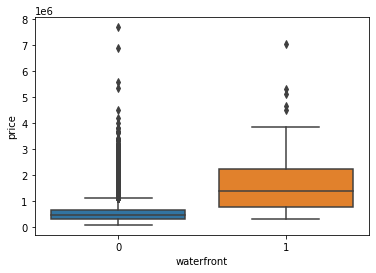

In [ ]:
# BoxPlot on waterfront variable

sns.boxplot(x="waterfront", y="price", data=df)   #Waterfronts with no view have more outliers 


### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


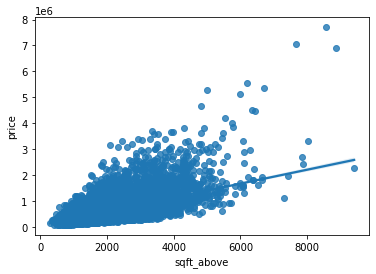

In [ ]:
sns.regplot(x="sqft_above", y="price", data=df)   #sqftf_above positively correlated with price

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()   #Initialization of lin model object, lm
lm.fit(X,Y)
lm.score(X, Y)
print("R-2 value is: ", lm.score(X, Y))

R-2 value is:  0.00046769430149007363


In [131]:
#df[['long', 'price']]

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.

R-square = 0.4928532179037931


In [ ]:
df[['sqft_living', 'price']]   #Extract sqft_living and price columns

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


In [ ]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()  #lin reg object
lm.fit(X,Y)
lm.score(X, Y)

#Find R^2
print('R-square is: ', lm.score(X, Y))

R-square is:  0.4928532179037931


### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

#Convert to dataframe
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

In [ ]:
#Check features for Nan Values
features

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,1.0,0,47.5112,3,0,0,1.00,1340,1180.0,7,1180
1,2.0,0,47.7210,3,400,0,2.25,1690,2170.0,7,2570
2,1.0,0,47.7379,2,0,0,1.00,2720,770.0,6,770
3,1.0,0,47.5208,4,910,0,3.00,1360,1050.0,7,1960
4,1.0,0,47.6168,3,0,0,2.00,1800,1680.0,8,1680
...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,0,47.6993,3,0,0,2.50,1530,1530.0,8,1530
21609,2.0,0,47.5107,4,0,0,2.50,1830,2310.0,8,2310
21610,2.0,0,47.5944,2,0,0,0.75,1020,1020.0,7,1020
21611,2.0,0,47.5345,3,0,0,2.50,1410,1600.0,8,1600


In [ ]:
#df['price'].replace(np.nan, df['price'].mean(), inplace=True)

In [134]:
np.isnan(df['price']).value_counts()   # No missing price values

False    21613
Name: price, dtype: int64

In [ ]:
#missing_data = df.isnull()   Check for missing data
missing_data = features.isnull()
missing_data.head(5)

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

lat
False    21613
Name: lat, dtype: int64

bedrooms
False    21613
Name: bedrooms, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

view
False    21613
Name: view, dtype: int64

bathrooms
False    21613
Name: bathrooms, dtype: int64

sqft_living15
False    21613
Name: sqft_living15, dtype: int64

sqft_above
False    21611
True         2
Name: sqft_above, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64



In [ ]:
# Sqrt_above has missing values - replace with mean value

avg_sqft_above = features['sqft_above'].astype(float).mean(axis=0)
print("Average of sq ft:", avg_sqft_above)

Average of sq ft: 1788.396094581463


In [ ]:
# Replacement of Missing Sqft_above values

features["sqft_above"].replace(np.nan, avg_sqft_above, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# Linear Multiple Regression on features/price

lm.fit(features, df['price'])

LinearRegression()

#### Question 7 Ans
Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [ ]:
# Get coefs for PRICE prediction
# features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
lm.coef_ 

array([-2.93603368e+04,  6.02159911e+05,  6.72996186e+05, -2.58757448e+04,
        6.53523627e+02,  6.70475457e+04, -3.44983516e+03,  4.31650674e+00,
        6.53973511e+02,  8.21646245e+04, -4.59629999e+02])

In [ ]:
lm.intercept_

-32391291.086791683

$$PRICE =-32391291.086791683 - 2.93603368e+04*floors + 6.02159911e+05*waterfront + 6.72996186e+05*lat - 2.58757448e+04*bedrooms + 6.53523627e+02*sqft_basement + 6.70475457e+04*view - 3.44983516e+03*bathrooms + 4.31650674e+00*sqft_living15 + 6.53973511e+02*sqft_above + 8.21646245e+04*grade - 4.59629999e+02*sqft_living $$

R-squared = 0.6577210668098352


Then calculate the R^2. Take a screenshot of your code.


In [ ]:
lm.score(features, df['price'])
print("R-Squared is: ", lm.score(features, df['price']))
#lm.score_

R-Squared is:  0.6577210668098352


### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
features = features.astype(float)   #Convert features to dtype float
pipe.fit(features, df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [153]:
ypipePred = pipe.predict(features)
ypipePred

array([349670.125, 559335.125, 447716.125, ..., 418896.125, 459778.625,
       418856.125])

In [ ]:
len(ypipe)

21613

In [159]:
# To Find the R^2

print('R-square is: ', lm.score(features, df['price']))   #np.mean(ypipePred)

R-square is:  0.6577210668098352


In [ ]:
ypipe = pipe.predict(features)
ypipe

array([349670.125, 559335.125, 447716.125, ..., 418896.125, 459778.625,
       418856.125])

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [ ]:
features

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,1.0,0.0,47.5112,3.0,0.0,0.0,1.00,1340.0,1180.0,7.0,1180.0
1,2.0,0.0,47.7210,3.0,400.0,0.0,2.25,1690.0,2170.0,7.0,2570.0
2,1.0,0.0,47.7379,2.0,0.0,0.0,1.00,2720.0,770.0,6.0,770.0
3,1.0,0.0,47.5208,4.0,910.0,0.0,3.00,1360.0,1050.0,7.0,1960.0
4,1.0,0.0,47.6168,3.0,0.0,0.0,2.00,1800.0,1680.0,8.0,1680.0
...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,0.0,47.6993,3.0,0.0,0.0,2.50,1530.0,1530.0,8.0,1530.0
21609,2.0,0.0,47.5107,4.0,0.0,0.0,2.50,1830.0,2310.0,8.0,2310.0
21610,2.0,0.0,47.5944,2.0,0.0,0.0,0.75,1020.0,1020.0,7.0,1020.0
21611,2.0,0.0,47.5345,3.0,0.0,0.0,2.50,1410.0,1600.0,8.0,1600.0


In [ ]:
Y = df['price']

In [ ]:
X = features


In [ ]:
#len(features)   21613

#len(df) = 21613

In [ ]:
# Concatenating dfs, features & df['price'] - working

frames = [features, df['price']]
featuresX = pd.concat(frames, axis=1)
featuresX

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living,price
0,1.0,0.0,47.5112,3.0,0.0,0.0,1.00,1340.0,1180.0,7.0,1180.0,221900.0
1,2.0,0.0,47.7210,3.0,400.0,0.0,2.25,1690.0,2170.0,7.0,2570.0,538000.0
2,1.0,0.0,47.7379,2.0,0.0,0.0,1.00,2720.0,770.0,6.0,770.0,180000.0
3,1.0,0.0,47.5208,4.0,910.0,0.0,3.00,1360.0,1050.0,7.0,1960.0,604000.0
4,1.0,0.0,47.6168,3.0,0.0,0.0,2.00,1800.0,1680.0,8.0,1680.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,0.0,47.6993,3.0,0.0,0.0,2.50,1530.0,1530.0,8.0,1530.0,360000.0
21609,2.0,0.0,47.5107,4.0,0.0,0.0,2.50,1830.0,2310.0,8.0,2310.0,400000.0
21610,2.0,0.0,47.5944,2.0,0.0,0.0,0.75,1020.0,1020.0,7.0,1020.0,402101.0
21611,2.0,0.0,47.5345,3.0,0.0,0.0,2.50,1410.0,1600.0,8.0,1600.0,400000.0


In [ ]:
#featuresX = [['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
X = features
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [ ]:
from sklearn.linear_model import Ridge

In [141]:
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train, y_train)

print('R-Squared is: ', RigeModel.score(x_test, y_test))

R-Squared is:  0.6480385015855317


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


In [142]:
#features =['floors', 'waterfront', 'lat' ,'bedrooms', 'sqft_basement', 'view', 'bathrooms','sqft_living15','sqft_above','grade','sqft_living']    

x_train, x_test, y_train, y_test = train_test_split(features, df['price'], test_size=0.3, random_state=0)
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['floors', 'waterfront', 'lat' ,'bedrooms', 'sqft_basement', 'view', 'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
#x_test_pr = pr.fit_transform(x_test[['floors', 'waterfront', 'lat' ,'bedrooms', 'sqft_basement', 'view', 'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_test_pr = (x_test[['floors', 'waterfront', 'lat' ,'bedrooms', 'sqft_basement', 'view', 'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)


Ridge(alpha=0.1)

In [143]:
# Prediction values using Test Data - To get Actucal values, use y_test_pr

yHat_test = RigeModel.predict(x_test_pr)
print('Prediction for y: ', RigeModel.predict(x_test_pr))

Prediction for y:  [ 447999.01567626 1394112.03687311  468166.94105577 ...  328019.31244376
  245888.35383853  176545.36461191]


In [144]:
#Getting R-Squared

test_score = RigeModel.score(x_test_pr, y_test)
    
print("R-Squared value: ", test_score)


R-Squared value:  0.6442149057287767


##### R-Squared is: 0.6442149057287767

<p>Once you complete your notebook you will have to share it. Select the icon on the top right a marked in red in the image below, a dialogue box should open, and select the option all&nbsp;content excluding sensitive code cells.</p>
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/share_notebook.png" alt="share notebook"  style="display: block; margin-left: auto; margin-right: auto;"/></p>
        <p></p>
        <p>You can then share the notebook&nbsp; via a&nbsp; URL by scrolling down as shown in the following image:</p>
        <p style="text-align: center;"><img width="600"  src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/url_notebook.png" alt="HTML" style="display: block; margin-left: auto; margin-right: auto;" /></p>
        <p>&nbsp;</p>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
